## Observations and Insights 

In [1]:
#%matplotlib notebook

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check dimensions of data frames
# mouse_metadata.shape
# study_results.shape


In [3]:
# Combine the data into a single dataset
combine_df=pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID') 

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_mice=combine_df['Mouse ID'].nunique()
number_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combine_df.count()
duplicate_df=combine_df[combine_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_df)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Check for duplicates in clean data frame again
duplicate_df=clean_df[clean_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice=clean_df['Mouse ID'].nunique()
number_mice

249

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df=clean_df.groupby(['Drug Regimen'])
#print(grouped_df)
grouped_df.head()
# tumor_volume=grouped_df['Tumor Volume (mm3)']
# tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
number_regimen=clean_df['Drug Regimen'].nunique()
number_regimen

10

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug_reg=clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
print(f"Mean of the tumor volume for each drug regimen: {mean_drug_reg}")

median_drug_reg=clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
print(f"Median of the tumor volume for each drug regimen: {median_drug_reg}")

variance_drug_reg=clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
print(f"Variance of the tumor volume for each drug regimen: {variance_drug_reg}")

stdev_drug_reg=clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
print(f"Standard Deviation of the tumor volume for each drug regimen: {stdev_drug_reg}")

sem_drug_reg=clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
print(f"SEM of the tumor volume for each drug regimen: {sem_drug_reg}")


Mean of the tumor volume for each drug regimen: Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Median of the tumor volume for each drug regimen: Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Variance of the tumor volume for each drug regimen: Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float6

In [13]:
# Assemble the resulting series into a single summary dataframe. 
summary_stats_df=pd.DataFrame({
    "Mean" : mean_drug_reg
    ,"Median" : median_drug_reg
    ,"Variance" : variance_drug_reg
    ,"Standard Deviation" : stdev_drug_reg
    ,"SEM" : sem_drug_reg})

summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
mean_drug_reg.dtypes

dtype('float64')

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# drug_group=clean_df.groupby("Drug Regimen")
# count_drugs=drug_group['Drug Regimen'].count()
#count_drugs
drug_group=clean_df["Drug Regimen"].value_counts()
drug_group

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

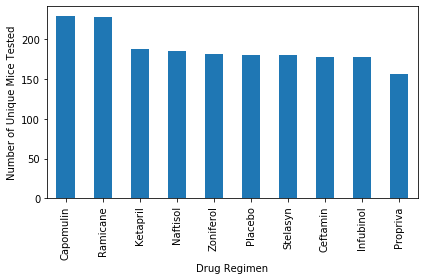

In [17]:
count_chart=drug_group.plot(kind='bar')

count_chart.set_ylabel("Number of Unique Mice Tested")
count_chart.set_xlabel("Drug Regimen")
plt.tight_layout()
plot1 = plt.figure(1)
plt.show()

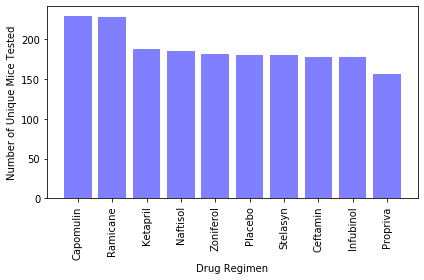

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(drug_group.index.values, drug_group.values, color='b', alpha=0.5, align='center')

plt.xticks(rotation="vertical")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

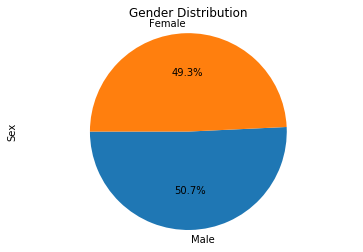

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=clean_df["Sex"].value_counts()
gender_group

gender_pie=gender_group.plot(kind="pie", y="Sex",startangle=180,autopct='%1.1f%%', title="Gender Distribution")
gender_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()


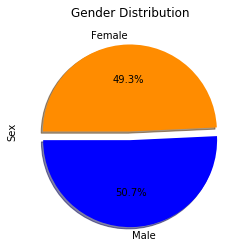

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_group.index.values 
sizes = gender_group 
colors=['blue', 'darkorange']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Sex") 
plt.title("Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mice_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
#greatest_df = grouped_mice_df.max()
#greatest_df=greatest_df.reset_index()
grouped_mice_df #this is list

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(grouped_mice_df, clean_df, how="left", on=("Mouse ID", "Timepoint"))
merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol_master_list = merge_df.loc[merge_df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    #storing tumor volumes for each 4 drugs all loops. Second drug overrides previous one, in next loop (only have vol for one drug at a time)
    # add subset 
    tumor_vol_data.append(tumor_vol_master_list)
   
    quartiles = tumor_vol_master_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_master_list.loc[(tumor_vol_master_list < lower_bound) | (tumor_vol_master_list > upper_bound)]
    
    print(f"Potential outlier for {drug} is {outliers}")
    

Potential outlier for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Infubinol is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outlier for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)


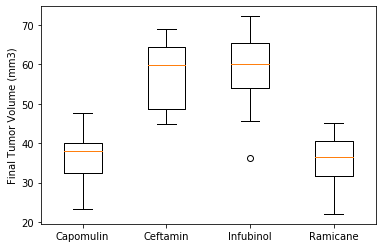

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

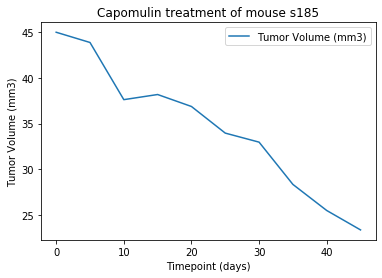

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin1_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
#Capomulin1_df.tail(20)
Capomulin2_df = Capomulin1_df.loc[Capomulin1_df["Mouse ID"]=="s185"]
#Capomulin2_df
line_plot = Capomulin2_df[["Timepoint", "Tumor Volume (mm3)"]]
line_plot = line_plot.set_index("Timepoint")
#line_plot
line_plot.plot.line()
x_axis = np.arange(0,45,5)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse s185")
plt.tight_layout
plt.show()
Capomulin2_df


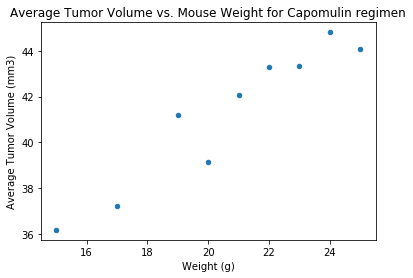

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mean_tumor_volume=Capomulin1_df.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
mean_tumor_volume

mean_tumor_volume_df=pd.DataFrame({
    "Weight (g)" : mean_tumor_volume.index.values
    ,"Average Tumor Volume (mm3)" : mean_tumor_volume
})
mean_tumor_volume_df

mean_tumor_volume_df.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin regimen")
plt.tight_layout
plt.show()

# correlation = round(st.pearsonr(mean_tumor_volume.index.values,mean_tumor_volume)[0],2)
# correlation


## Correlation and Regression

Correlation coefficient: 0.95
The r-squared: 0.9034966277438606
Line equation: y = 0.89x + 22.76


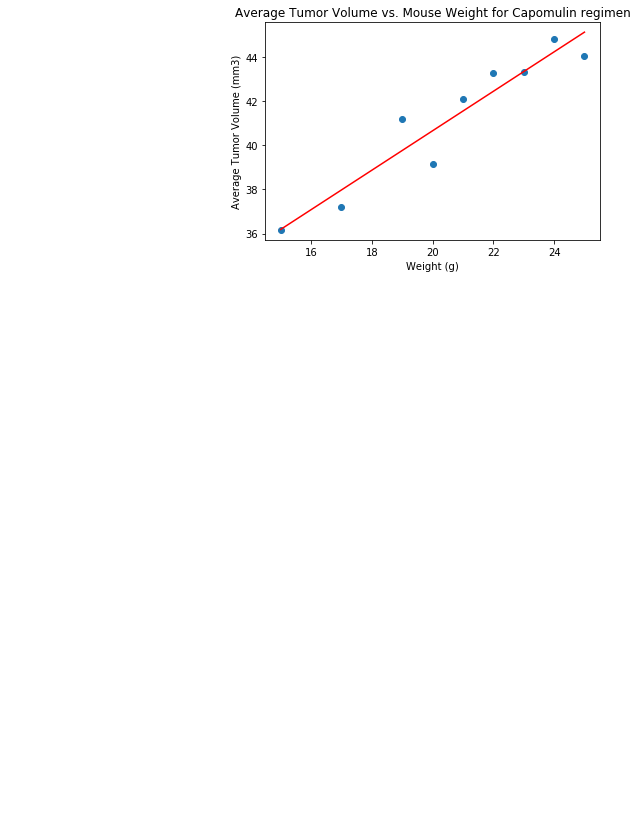

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(mean_tumor_volume.index.values,mean_tumor_volume)[0],2)
print(f"Correlation coefficient: {correlation}")

x_values = mean_tumor_volume.index.values
y_values = mean_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#mean_tumor_volume_df.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin regimen")
print(f"The r-squared: {rvalue**2}")
print(f"Line equation: {line_eq}")
plt.tight_layout
plt.show()


In [38]:
line_eq

'y = 0.89x + 22.76'